In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
case = 'Nepal'
output_folder = "MPMORDM Results v1 2015"

In [3]:
with open('{}/{}/python_objects.pickle'.format(case, output_folder),
          'rb') as handle:
    global_label_tree, EMA_model_dict, global_dfs_var_unc_data, global_fixed_unc, global_policy_tree = pickle.load(
        handle)

In [4]:
global_label_tree['p3'][0]

'p0n0p1n1p2n8p3n53'

In [5]:
from ema_workbench import load_results
import ema_workbench.analysis.prim as prim

from ema_workbench import ema_logging
# from ema_workbench.em_framework.

ema_logging.log_to_stderr(ema_logging.INFO)

import matplotlib.pyplot as plt
# %matplotlib notebook

C:\Users\timro\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [6]:
results = load_results("{}/{}/p0n0p1n1p2n8p3n53.tar.gz".format(case,output_folder))

[MainProcess/INFO] results loaded succesfully from C:\Users\timro\Dropbox\MSc EPA\0 Master Thesis\Python Files\Thesis\Facility Location Model\Nepal\MPMORDM Results v1 2015\p0n0p1n1p2n8p3n53.tar.gz


In [7]:
results[1].keys()

dict_keys(['total_costs', 'nr_uncovered_DPs', 'total_uncovered_demand', 'max_distr_time'])

In [8]:
# %matplotlib notebook

## Costs

In [9]:
def classify_totcosts(data):
    #get the output 
    result = data['total_costs']
    #get threshold worst 20%, assuming minimisation
    worst_20 = np.percentile(result, 80)
    
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if higher than threshold of worst 20%
    classes[result[:] > worst_20] = 1
    
    return classes

In [10]:
prim_obj = prim.setup_prim(results, classify_totcosts, threshold=0.8)

box1 = prim_obj.find_box()

[MainProcess/INFO] 2000 points remaining, containing 400 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.078, coverage: 0.39, density: 1.0 restricted_dimensions: 10


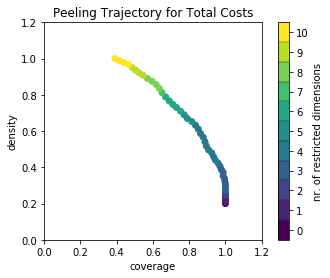

In [11]:
box1.show_tradeoff()
plt.title("Peeling Trajectory for Total Costs")

plt.show()


coverage        0.97
density     0.405858
mass           0.478
mean        0.405858
res dim            3
Name: 14, dtype: object

                        box 14                                     
                           min        max                 qp values
unit_transport_cost   0.880027   1.999837   [5.013345602934717e-09]
demand_per_affected  19.628996  49.931413  [5.7964583228401567e-08]
FL_range              2.792149   5.999498    [9.08625115097314e-06]



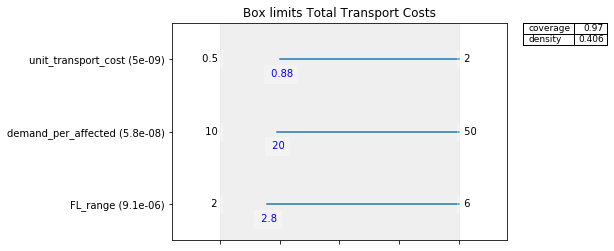

In [15]:
box1.inspect(14)
box1.inspect(14, style="graph", )
# box1.inspect(25)
# box1.inspect(25, style="graph", )
plt.title("Box limits Total Transport Costs")
plt.show()


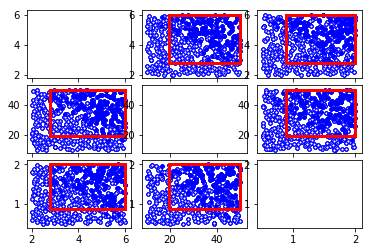

In [16]:
box1.select(14)
fig = box1.show_pairs_scatter()
# fig.set_size_inches((12,12))
# plt.tight_layout()
plt.show()

In [18]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 1472 points remaining, containing 66 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] box does not meet threshold criteria, value is 0.6078431372549019, returning dump box


In [17]:
print (prim_obj.stats_to_dataframe())
print (prim_obj.boxes_to_dataframe())

       coverage   density   mass  res_dim
box 1      0.97  0.405858  0.478        3
                        box 1         
                          min      max
unit_transport_cost  0.880027  1.99984
demand_per_affected    19.629  49.9314
FL_range              2.79215   5.9995


## Travel Time

In [17]:
def classify_max_trav_t(data):
    #get the output 
    result = data['max_distr_time']
    #get threshold worst 20%, assuming minimisation
    worst_20 = np.percentile(result, 80)
    
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if higher than threshold of worst 20%
    classes[result[:] > worst_20] = 1
    
    return classes

In [18]:
prim_obj = prim.setup_prim(results, classify_max_trav_t, threshold=0.8)

box1 = prim_obj.find_box()

[MainProcess/INFO] 2000 points remaining, containing 399 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.198, coverage: 0.9924812030075187, density: 1.0 restricted_dimensions: 2


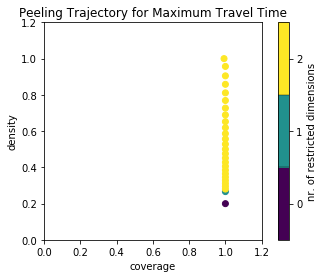

In [19]:
# box1.show_ppt()
# plt.show()

box1.show_tradeoff()
plt.title("Peeling Trajectory for Maximum Travel Time")
plt.show()

coverage    0.992481
density            1
mass           0.198
mean               1
res dim            2
Name: 26, dtype: object

              box 26                                       
                 min          max                 qp values
DSRDP34      1.54398      1.68305  [1.791134115442451e-228]
policy   {10, 3, 13}  {10, 3, 13}   [3.343954065709201e-50]



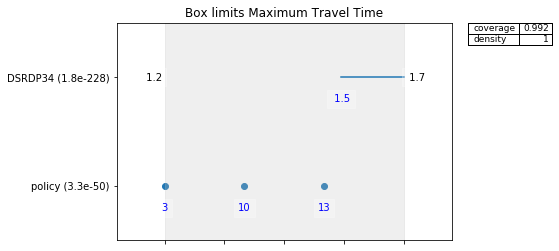

In [21]:
box1.inspect(26)
box1.inspect(26, style="graph")
# box1.inspect(39)
# box1.inspect(39, style="graph")
plt.title("Box limits Maximum Travel Time")
plt.show()


doesnt work because the input is a policy set


<IPython.core.display.Javascript object>


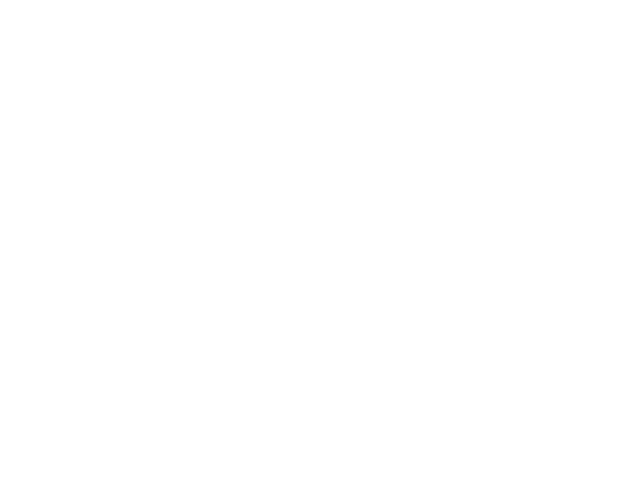

TypeError: float() argument must be a string or a number, not 'set'

In [24]:
print("doesnt work because the input is a policy set")
box1.select(39)
fig = box1.show_pairs_scatter()
# fig.set_size_inches((12,12))
# plt.tight_layout()
plt.show()

In [25]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 1808 points remaining, containing 6 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] box does not meet threshold criteria, value is 0.05714285714285714, returning dump box


In [25]:

# box2.show_tradeoff()
# plt.title("Box2: Peeling Trajectory for Maximum Travel Time")
# plt.show()

In [26]:
print (prim_obj.stats_to_dataframe())
print (prim_obj.boxes_to_dataframe())

       coverage   density   mass  res_dim
box 1  0.969697  1.000000  0.096        3
box 2  0.030303  0.003319  0.904        0
               box 1                         box 2                 
                 min          max              min              max
DSRDP34      1.61569      1.68305          1.15326          1.68305
policy   {10, 3, 13}  {10, 3, 13}  {16, 10, 3, 13}  {16, 10, 3, 13}
DSRDP31      1.31669      1.81122          1.31669          1.83625


In [46]:
# Check with visual if everything is indeed right
global_policy_tree['p0n0p1n1p2n8p3n53']

{'FLO0': 0.0,
 'FLO1': 0.0,
 'FLO2': 0.0,
 'FLO3': 0.0,
 'FLO4': 1.0,
 'FLO5': 0.0,
 'FLO6': 0.0,
 'FLO7': 1.0,
 'FLO8': 0.0,
 'FLO9': 0.0,
 'FLO10': 0.0,
 'FLO11': 1.0,
 'FLO12': 0.0,
 'FLO13': 0.0,
 'FLO14': 0.0,
 'FLO15': 0.0,
 'FLO16': 0.0,
 'FLO17': 0.0,
 'FLO18': 0.0,
 'FLO19': 0.0}

## Total Uncovered Demand

In [22]:



def classify_tot_uncov_demand(data):
    #get the output 
    result = data['total_uncovered_demand']
    #get threshold worst 20%, assuming minimisation
    worst_20 = np.percentile(result, 80)
    
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if higher than threshold of worst 20%
    classes[result[:] > worst_20] = 1
    
    return classes



In [23]:
prim_obj = prim.setup_prim(results, classify_tot_uncov_demand, threshold=0.8)

box1 = prim_obj.find_box()

[MainProcess/INFO] 2000 points remaining, containing 400 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.07, coverage: 0.35, density: 1.0 restricted_dimensions: 20


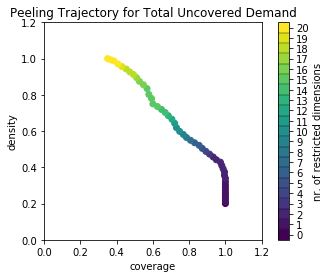

In [24]:
# box1.show_ppt()
# plt.show()

box1.show_tradeoff()
plt.title("Peeling Trajectory for Total Uncovered Demand")
plt.show()

coverage      0.9325
density     0.457108
mass           0.408
mean        0.457108
res dim            2
Name: 17, dtype: object

                        box 17                                     
                           min        max                 qp values
FL_range              2.004204   3.815895  [3.2162831132379245e-50]
demand_per_affected  14.525948  49.931413    [0.014134368637062932]



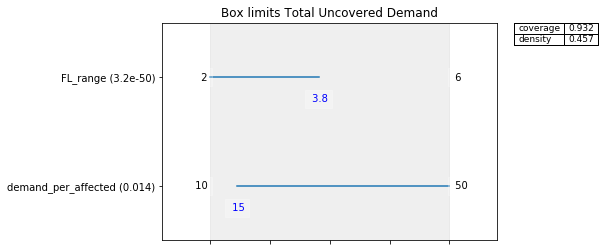

In [27]:
box1.inspect(17)
box1.inspect(17, style="graph")
# box1.inspect(20)
# box1.inspect(20, style="graph")
plt.title("Box limits Total Uncovered Demand")
plt.show()
# box1.inspect(48)

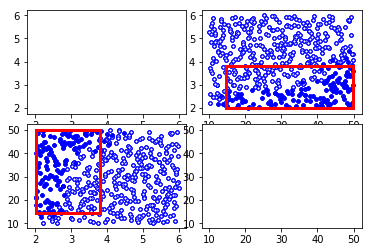

In [28]:
# print("doesnt work because the input is a policy set")
box1.select(17)
fig = box1.show_pairs_scatter()
# fig.set_size_inches((12,12))
# plt.tight_layout()
plt.show()

In [26]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 1184 points remaining, containing 27 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] box does not meet threshold criteria, value is 0.27, returning dump box


In [27]:
print (prim_obj.stats_to_dataframe())
print (prim_obj.boxes_to_dataframe())

       coverage   density   mass  res_dim
box 1    0.9325  0.457108  0.408        2
box 2    0.0675  0.022804  0.592        0
                       box 1             box 2         
                         min      max      min      max
FL_range              2.0042  3.81589   2.0042   5.9995
demand_per_affected  14.5259  49.9314  10.0768  49.9314


## # Uncovered Demand Points

In [29]:
def classify_nr_uncov_DPs(data):
    #get the output 
    result = data['nr_uncovered_DPs']
    #get threshold worst 20%, assuming minimisation
    worst_20 = np.percentile(result, 80)
    
    #make an empty array of length equal to number of cases 
    classes =  np.zeros(result.shape[0])
    
    #if higher than threshold of worst 20%
    classes[result[:] > worst_20] = 1
    
    return classes

In [30]:
prim_obj = prim.setup_prim(results, classify_nr_uncov_DPs, threshold=0.8)

box1 = prim_obj.find_box()

[MainProcess/INFO] 2000 points remaining, containing 388 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] mean: 1.0, mass: 0.152, coverage: 0.7835051546391752, density: 1.0 restricted_dimensions: 1


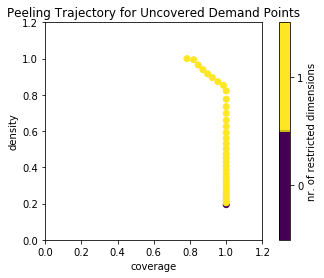

In [31]:
# box1.show_ppt()
# plt.show()

box1.show_tradeoff()
plt.title("Peeling Trajectory for Uncovered Demand Points")
plt.show()

coverage    0.819588
density      0.99375
mass            0.16
mean         0.99375
res dim            1
Name: 34, dtype: object

            box 34                                     
               min       max                  qp values
FL_range  2.004204  2.638628  [1.1020117903032392e-222]



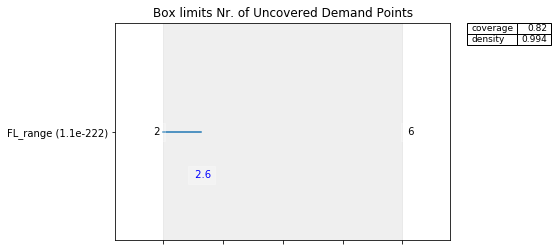

In [33]:
box1.inspect(34)
box1.inspect(34, style="graph")
# box1.inspect(28)
# box1.inspect(28, style="graph")
plt.title("Box limits Nr. of Uncovered Demand Points")
plt.show()
# box1.inspect(48)

In [22]:
print("Single dimension can't plot scatter")
box1.select(34)
# fig = box1.show_pairs_scatter()
# # fig.set_size_inches((12,12))
# # plt.tight_layout()
# plt.show()

Single dimension can't plot scatter


In [23]:
box2 = prim_obj.find_box()

[MainProcess/INFO] 1680 points remaining, containing 70 cases of interest
C:\Users\timro\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)
[MainProcess/INFO] box does not meet threshold criteria, value is 0.6730769230769231, returning dump box


In [24]:
print (prim_obj.stats_to_dataframe())
print (prim_obj.boxes_to_dataframe())

       coverage   density  mass  res_dim
box 1  0.819588  0.993750  0.16        1
box 2  0.180412  0.041667  0.84        0
           box 1            box 2        
             min      max     min     max
FL_range  2.0042  2.63863  2.0042  5.9995
